# BERGERPAINT_Stock_Analysis

!pip install nsepy

In [1]:
!pip install nsepy 
!pip install seaborn
!pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings('ignore')
import nsepy as nse
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from datetime import date
import datetime
current_time=datetime.datetime.now()

In [5]:
bp=nse.get_history(symbol='BERGEPAINT',start=date(2010,1,1),end=date(current_time.year,current_time.month,current_time.day))

Exception in thread Thread-175:
Traceback (most recent call last):
  File "c:\Users\vedsk\AppData\Local\Programs\Python\Python38\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\Users\vedsk\AppData\Local\Programs\Python\Python38\lib\site-packages\nsepy\commons.py", line 132, in run
Exception in thread Thread-181:
Traceback (most recent call last):
  File "c:\Users\vedsk\AppData\Local\Programs\Python\Python38\lib\threading.py", line 932, in _bootstrap_inner
    self.result = self._target(*self._args, **self._kwargs)
  File "c:\Users\vedsk\AppData\Local\Programs\Python\Python38\lib\site-packages\nsepy\history.py", line 138, in get_history
    self.run()
  File "c:\Users\vedsk\AppData\Local\Programs\Python\Python38\lib\site-packages\nsepy\commons.py", line 132, in run
    return get_history_quanta(**kwargs)
  File "c:\Users\vedsk\AppData\Local\Programs\Python\Python38\lib\site-packages\nsepy\history.py", line 143, in get_history_quanta
    self.result = self._tar

AttributeError: 'ThreadReturns' object has no attribute 'result'

In [6]:
from datetime import date
from nsepy import get_history

# Set the start and end dates
start_date = date(2010, 1, 1)
end_date = date.today()

# Extract the data for Berger Paints
bp = get_history(symbol='BERGEPAINT', start=start_date, end=end_date)

# Print the first 5 rows of the data
print(bp.head())

Exception in thread Thread-235:
Traceback (most recent call last):
  File "c:\Users\vedsk\AppData\Local\Programs\Python\Python38\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\Users\vedsk\AppData\Local\Programs\Python\Python38\lib\site-packages\nsepy\commons.py", line 132, in run
    self.result = self._target(*self._args, **self._kwargs)
  File "c:\Users\vedsk\AppData\Local\Programs\Python\Python38\lib\site-packages\nsepy\history.py", line 138, in get_history
    return get_history_quanta(**kwargs)
  File "c:\Users\vedsk\AppData\Local\Programs\Python\Python38\lib\site-packages\nsepy\history.py", line 143, in get_history_quanta
    df = url_to_df(url=url,
  File "c:\Users\vedsk\AppData\Local\Programs\Python\Python38\lib\site-packages\nsepy\history.py", line 151, in url_to_df
    resp = url(**params)
  File "c:\Users\vedsk\AppData\Local\Programs\Python\Python38\lib\site-packages\nsepy\commons.py", line 167, in __call__
    return self.session.get(url, params=

AttributeError: 'ThreadReturns' object has no attribute 'result'

In [ ]:
bp.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2010-01-04,BERGEPAINT,EQ,60.00,60.2,61.00,59.80,60.60,60.45,60.55,115840,7.013585e+11,NaN,52675,0.4547
2010-01-05,BERGEPAINT,EQ,60.45,60.6,61.55,60.15,60.50,60.55,60.87,183787,1.118625e+12,NaN,104364,0.5679
2010-01-06,BERGEPAINT,EQ,60.55,60.6,62.50,60.20,61.00,61.00,61.36,162261,9.955817e+11,NaN,75940,0.4680
2010-01-07,BERGEPAINT,EQ,61.00,61.4,61.70,60.60,60.85,61.05,60.98,68512,4.177681e+11,NaN,37092,0.5414
2010-01-08,BERGEPAINT,EQ,61.05,61.1,61.90,60.25,60.90,60.90,61.26,108841,6.667969e+11,NaN,40547,0.3725


In [ ]:
bp.shape

(3283, 14)

In [ ]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3283 entries, 2010-01-04 to 2023-03-20
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3283 non-null   object 
 1   Series              3283 non-null   object 
 2   Prev Close          3283 non-null   float64
 3   Open                3283 non-null   float64
 4   High                3283 non-null   float64
 5   Low                 3283 non-null   float64
 6   Last                3283 non-null   float64
 7   Close               3283 non-null   float64
 8   VWAP                3283 non-null   float64
 9   Volume              3283 non-null   int64  
 10  Turnover            3283 non-null   float64
 11  Trades              2928 non-null   float64
 12  Deliverable Volume  3283 non-null   int64  
 13  %Deliverble         3283 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 384.7+ KB


In [ ]:
bp.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3.283000e+03,3.283000e+03,2928.000000,3.283000e+03,3283.000000
mean,323.904310,324.417256,329.150137,319.472038,324.150046,324.068276,324.388949,6.322850e+05,2.687021e+13,14881.491120,2.356615e+05,0.440833
std,212.332304,212.674930,214.828243,209.960750,212.386623,212.334872,212.314314,8.416286e+05,4.565849e+13,15616.945452,4.002553e+05,0.164975
min,54.450000,54.850000,55.000000,51.050000,54.400000,54.450000,54.310000,3.562000e+03,3.200237e+10,83.000000,2.319000e+03,0.063600
25%,192.950000,193.625000,197.000000,190.000000,193.100000,193.075000,193.645000,1.622355e+05,2.675458e+12,4288.500000,7.529050e+04,0.317900
50%,251.300000,251.400000,255.250000,247.600000,251.350000,251.400000,251.620000,4.175390e+05,1.073657e+13,10514.500000,1.648920e+05,0.431100
75%,478.275000,479.200000,488.550000,465.925000,479.750000,478.325000,477.990000,8.212790e+05,3.531741e+13,20310.500000,3.024980e+05,0.549900
max,864.950000,872.950000,872.950000,851.550000,860.800000,864.950000,859.330000,2.678652e+07,1.313936e+15,191629.000000,1.868596e+07,0.968700


In [ ]:
bp.isnull().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                355
Deliverable Volume      0
%Deliverble             0
dtype: int64

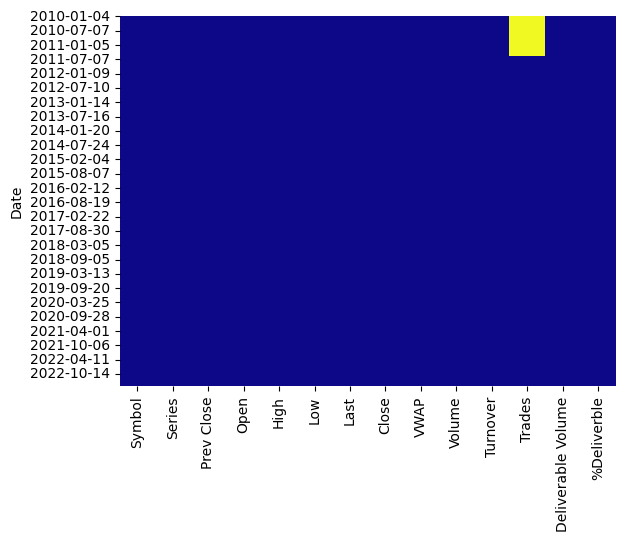

In [ ]:
sns.heatmap(data=bp.isnull(), cmap='plasma', cbar=False);

In [ ]:
bp['Trades']=bp['Trades'].fillna(method='bfill')

In [ ]:
bp.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

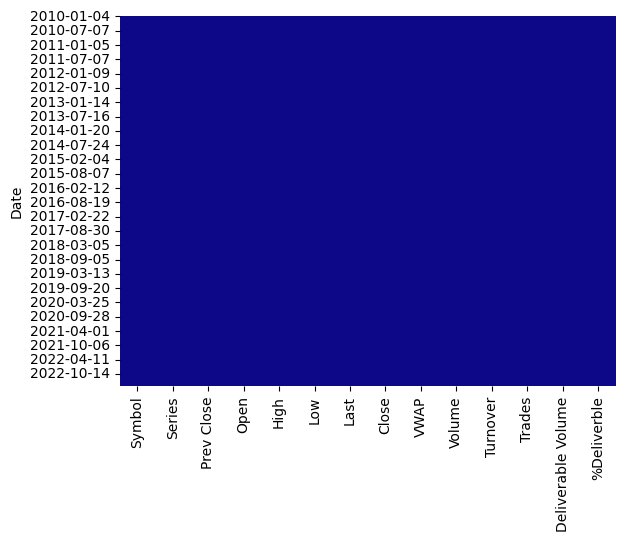

In [ ]:
sns.heatmap(data=bp.isnull(), cmap='plasma', cbar=False);

In [ ]:
bp.duplicated().sum()

3

In [ ]:
bp.drop_duplicates(inplace=True)

In [ ]:
bp.duplicated().sum()

0

In [ ]:
#since 'Symbol' and 'Series' is constant value we can drop it
bp.drop(['Symbol','Series'],axis=1,inplace=True)

# EDA

<Axes: >

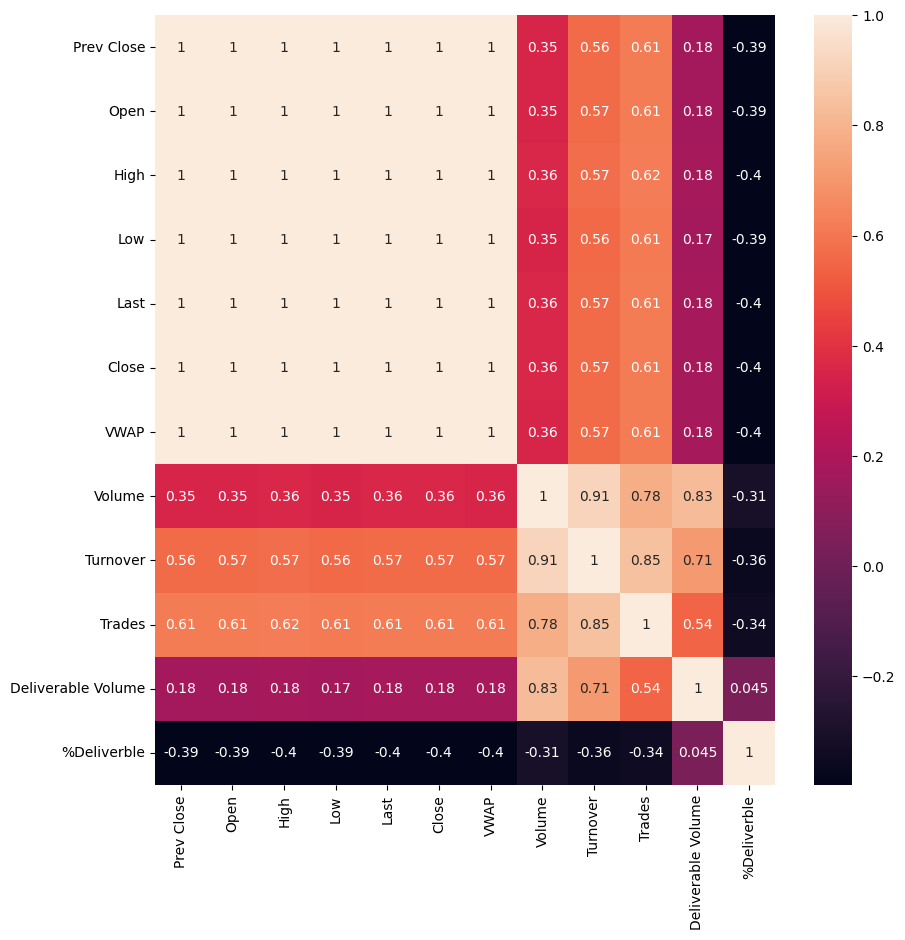

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(bp.corr(),annot=True)

we observe from scatter plot and heat map

1.Prev Close,open,High,Low,Last,Close,VWAP is higly co related with each other.

2.Volume is highly corelated with Turnover,Deliverable Volume.

3.Trades is moderatly co related with volume,Turnover,Deliverable volume.

4.Deliverable Volume is highly co related with Volume,Turnover and moderatly with Trades.

5.%Deliverable Volume is moderatly co related with Deliverable Volume

In [ ]:
#we are considering columns 
bp=bp[['Open','High','Low','Close']]

In [ ]:
bp.head()

,Open,High,Low,Close
Date,,,,
2010-01-04,60.2,61.00,59.80,60.45
2010-01-05,60.6,61.55,60.15,60.55
2010-01-06,60.6,62.50,60.20,61.00
2010-01-07,61.4,61.70,60.60,61.05
2010-01-08,61.1,61.90,60.25,60.90


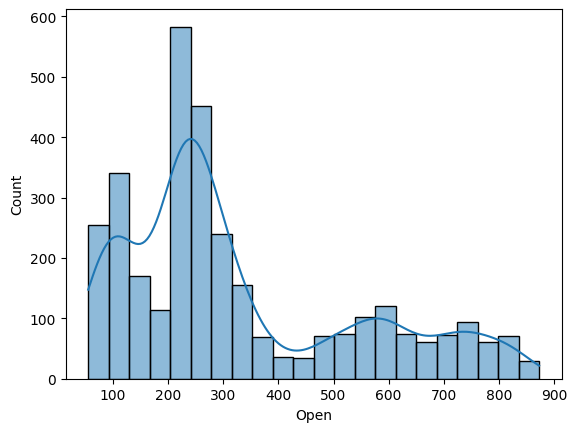

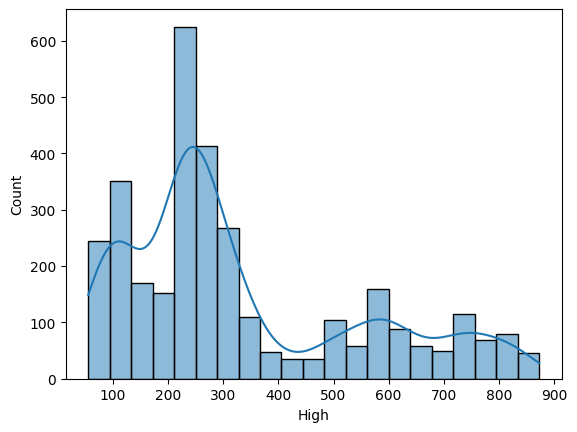

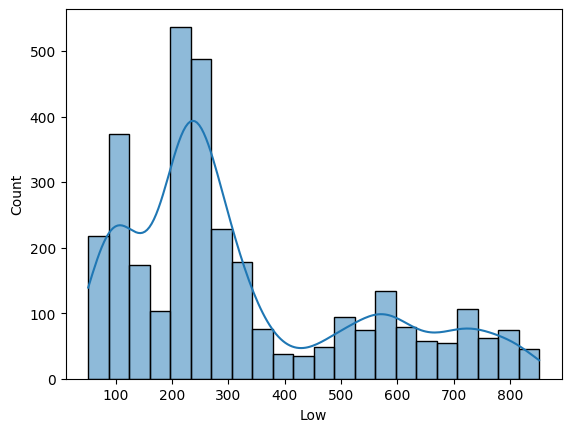

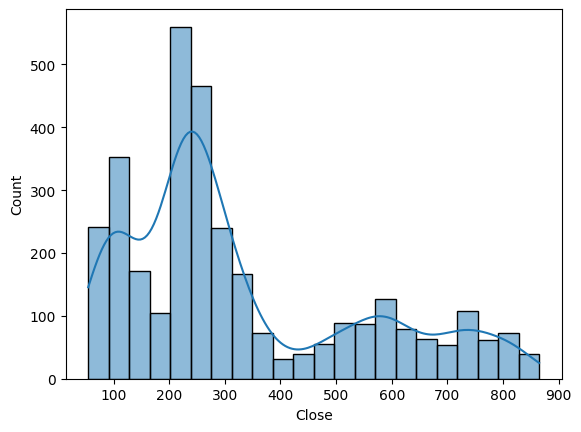

In [ ]:
for i in bp.columns:
    sns.histplot(bp[i],kde=True)
    plt.show()

Open,High,Low,Close is not normally distributed.


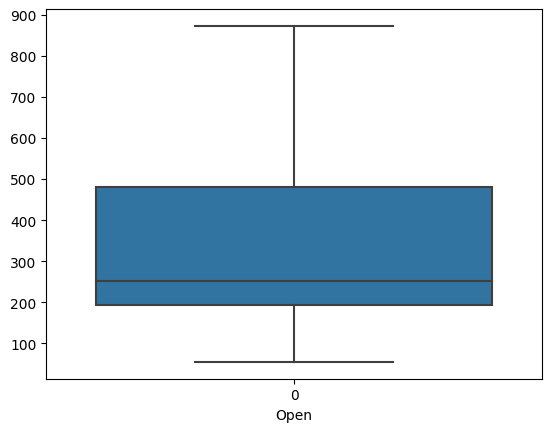

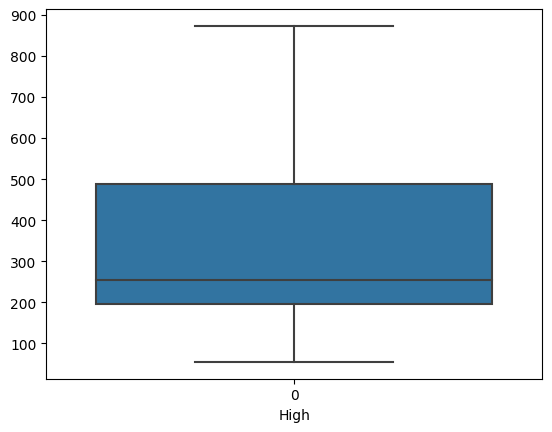

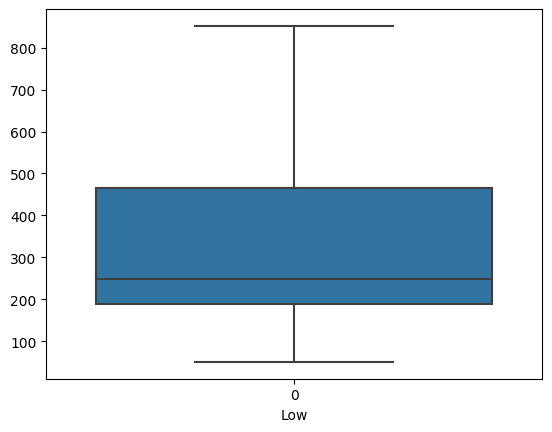

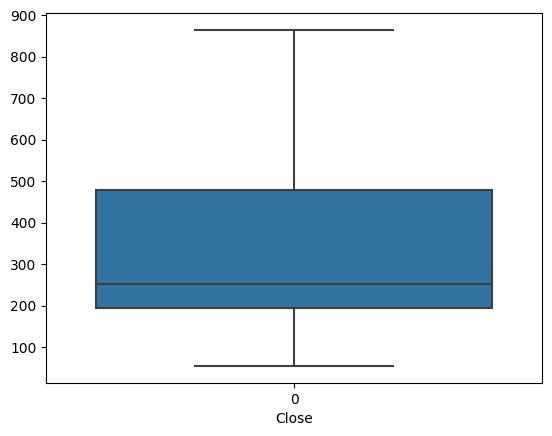

In [ ]:
for i in bp.columns:
        sns.boxplot(bp[i])
        plt.xlabel(i)
        plt.show()

There are no outliers in Open,High,Low,Close.

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

<Figure size 1000x1000 with 0 Axes>

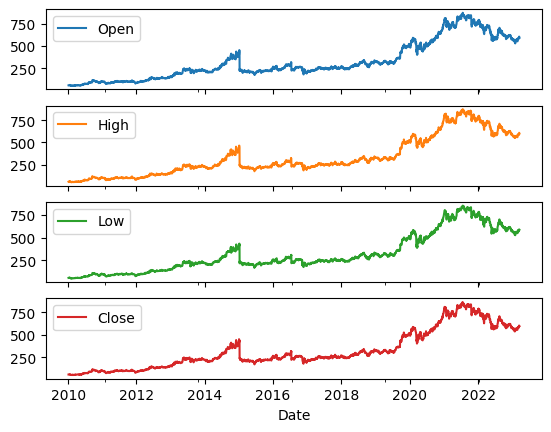

In [ ]:
plt.figure(figsize=(10,10))
bp.plot(subplots=True)

In Open,High,Low,Close we can see trend is increasing over the time.

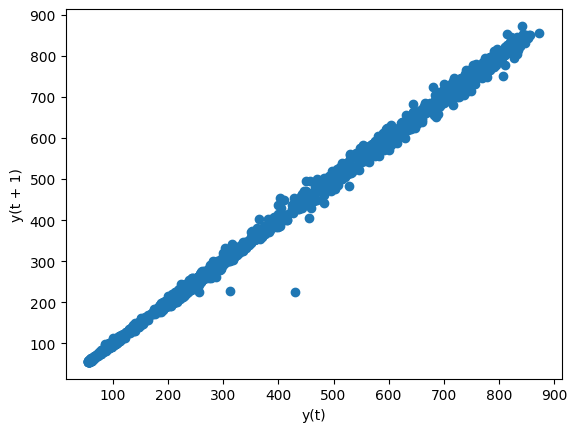

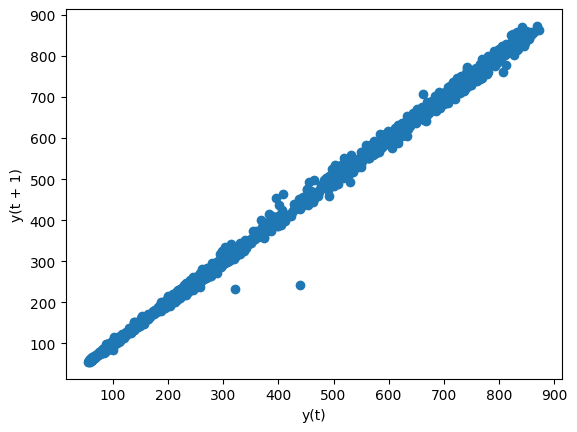

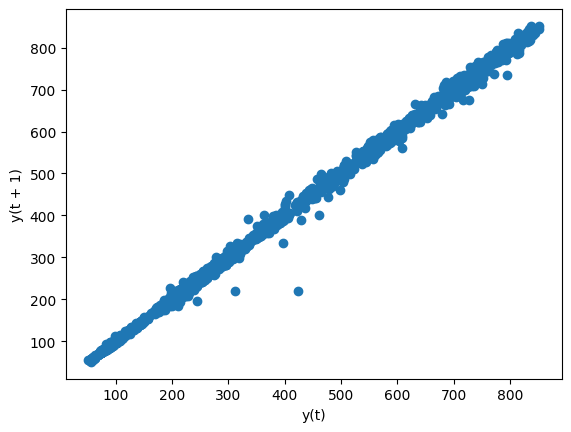

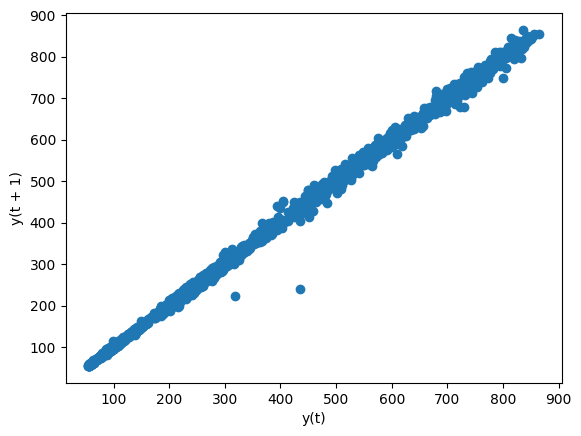

In [ ]:
from pandas.plotting import lag_plot
for i in bp.columns:
    lag_plot(bp[i])
    plt.show()

From lag_plot,we can visualize the autocorrelation structure of the time series data.
1. In Open,High,Low,Close feature it suggests a strong positive autocorrelation.

### Time series decomposition plot

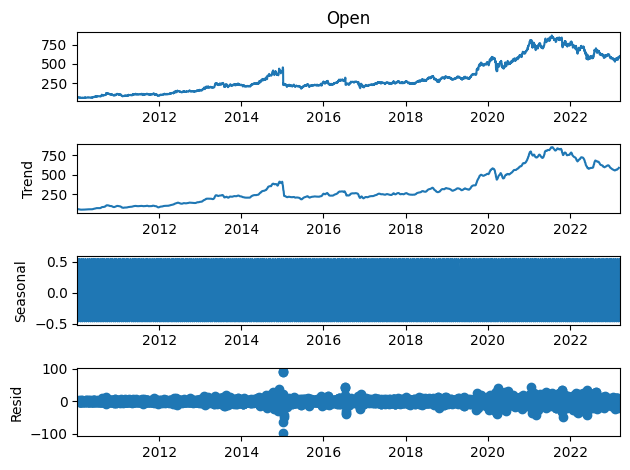

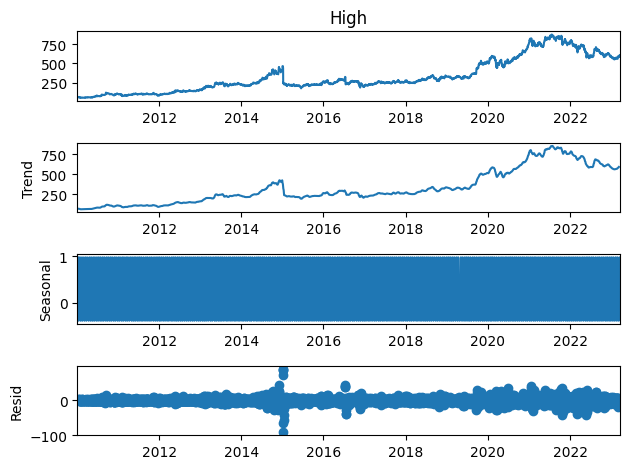

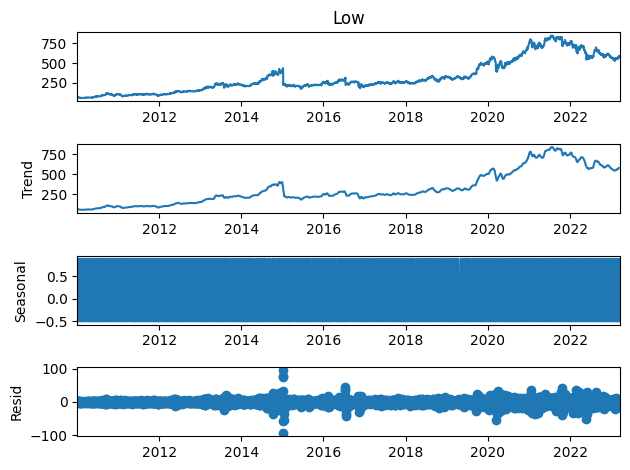

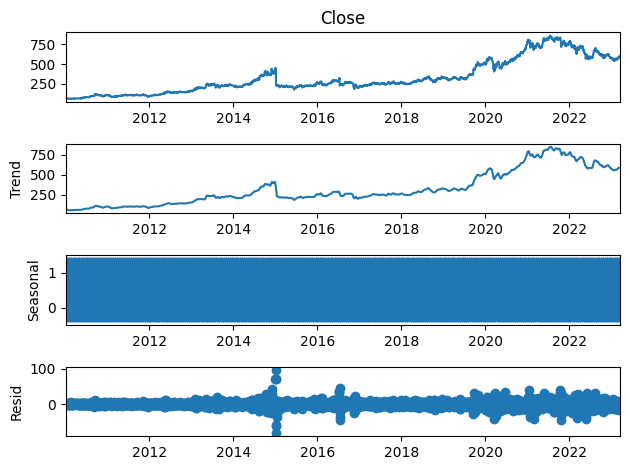

In [ ]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
for i in bp.columns:
    decompose_ts_add = seasonal_decompose(bp[i],period=12)
    decompose_ts_add.plot()
    plt.show()

## Pre-Processing


In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(bp)

## Train and Test data

In [ ]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data = scaled_data[0:train_size,:]
test_data = scaled_data[train_size:len(scaled_data),:]

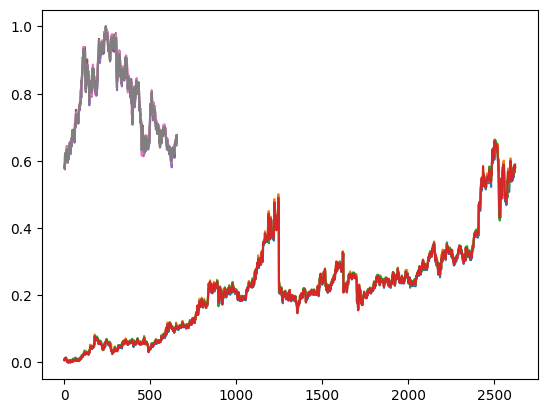

In [ ]:
plt.plot(train_data)
plt.plot(test_data)

In [ ]:
def create_dataset(data, time_step=1):
    X_data, y_data = [], []
    for i in range(len(data)-time_step):
        X_data.append(data[i:(i+time_step), :])
        y_data.append(data[i+time_step, :])
    return np.array(X_data), np.array(y_data)


In [ ]:
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


## Model Building

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 4)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(4))


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
41/41 [==============================] - 12s 81ms/step - loss: 0.0084
Epoch 2/50
41/41 [==============================] - 3s 80ms/step - loss: 6.9900e-04
Epoch 3/50
41/41 [==============================] - 3s 81ms/step - loss: 5.6872e-04
Epoch 4/50
41/41 [==============================] - 3s 83ms/step - loss: 5.6336e-04
Epoch 5/50
41/41 [==============================] - 4s 87ms/step - loss: 5.4206e-04
Epoch 6/50
41/41 [==============================] - 3s 82ms/step - loss: 5.0479e-04
Epoch 7/50
41/41 [==============================] - 4s 86ms/step - loss: 4.6663e-04
Epoch 8/50
41/41 [==============================] - 4s 91ms/step - loss: 4.5397e-04
Epoch 9/50
41/41 [==============================] - 4s 85ms/step - loss: 4.5231e-04
Epoch 10/50
41/41 [==============================] - 3s 82ms/step - loss: 4.3194e-04
Epoch 11/50
41/41 [==============================] - 3s 84ms/step - loss: 3.9478e-04
Epoch 12/50
41/41 [==============================] - 3s 84ms/step - loss: 4.2

In [ ]:
predictions = model.predict(X_test)


19/19 [==============================] - 2s 21ms/step


In [ ]:
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)


In [ ]:
predictions

array([[608.9053 , 612.8628 , 595.48114, 604.0756 ],
       [607.8153 , 611.7243 , 594.2115 , 603.2969 ],
       [618.1585 , 622.3317 , 603.9354 , 614.3821 ],
       ...,
       [595.4504 , 600.0114 , 582.19543, 592.0778 ],
       [609.1926 , 613.98755, 595.45056, 606.2198 ],
       [609.6398 , 614.4903 , 596.159  , 605.93475]], dtype=float32)

In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print('RMSE:', rmse)


RMSE: 12.51878401252169


last_60_days = bp[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_pred = []
X_pred.append(last_60_days_scaled)
X_pred = np.array(X_pred)
for i in range(30):
    pred = model.predict


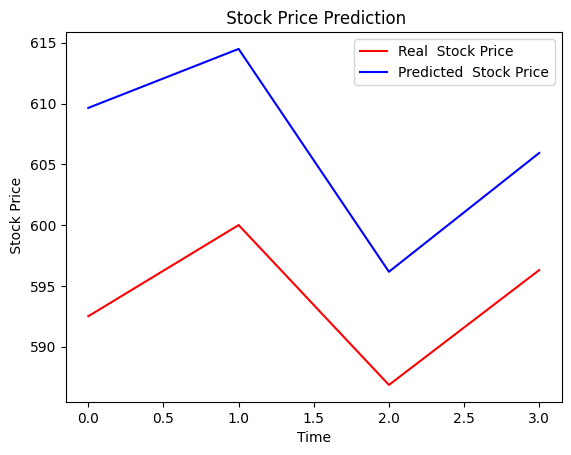

In [ ]:
plt.plot(y_test[-1], color = 'red', label = 'Real  Stock Price')
plt.plot(predictions[-1], color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
n_future = 30  # Number of days to forecast
n_past = 60    #Past 60 days

In [ ]:
last_60_days = scaled_data[-n_past:]
X_test = np.array([last_60_days])
for i in range(n_future):
    next_day_pred = model.predict(X_test)[0, 0]
    last_60_days = np.append(last_60_days[1:, :], [[next_day_pred, next_day_pred, next_day_pred, next_day_pred]], axis=0)
    X_test = np.array([last_60_days])
    print("Day {}: {}".format(i+1, scaler.inverse_transform([[0, 0, 0, next_day_pred]])[0, 3]))

1/1 [==============================] - 0s 57ms/step
Day 1: 598.234777969122
1/1 [==============================] - 0s 32ms/step
Day 2: 598.9671992778779
1/1 [==============================] - 0s 35ms/step
Day 3: 601.0083266913891
1/1 [==============================] - 0s 27ms/step
Day 4: 603.3623068451882
1/1 [==============================] - 0s 30ms/step
Day 5: 605.8945009827614
1/1 [==============================] - 0s 33ms/step
Day 6: 608.477613401413
1/1 [==============================] - 0s 33ms/step
Day 7: 611.0094693720341
1/1 [==============================] - 0s 32ms/step
Day 8: 613.4277495563031
1/1 [==============================] - 0s 30ms/step
Day 9: 615.7043377876282
1/1 [==============================] - 0s 38ms/step
Day 10: 617.8369152069092
1/1 [==============================] - 0s 32ms/step
Day 11: 619.8395398974419
1/1 [==============================] - 0s 25ms/step
Day 12: 621.733709615469
1/1 [==============================] - 0s 25ms/step
Day 13: 623.542757880687

In [ ]:
import pickle

filename='bp_trained_model.sav'
pickle.dump(model,open(filename,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-21 13:08:31         3463
metadata.json                                  2023-03-21 13:08:31      

In [ ]:
loaded_model=pickle.load(open('bp_trained_model.sav','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-21 13:08:30         3463
metadata.json                                  2023-03-21 13:08:30           64
variables.h5                                   2023-03-21 13:08:30       652912
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
........

In [ ]:
last_30_days = scaled_data[-n_past:]
X_test = np.array([last_30_days])
predictions = []

for i in range(n_future):
    next_day_pred = loaded_model.predict(X_test)[0, 0]
    last_30_days = np.append(last_30_days[1:, :], [[next_day_pred, next_day_pred, next_day_pred, next_day_pred]], axis=0)
    X_test = np.array([last_30_days])
    pred_value = scaler.inverse_transform([[0, 0, 0, next_day_pred]])[0, 3]
    predictions.append(pred_value)
    print("Day {}: {}".format(i+1, pred_value))


1/1 [==============================] - 1s 1s/step
Day 1: 598.234777969122
1/1 [==============================] - 0s 30ms/step
Day 2: 598.9671992778779
1/1 [==============================] - 0s 32ms/step
Day 3: 601.0083266913891
1/1 [==============================] - 0s 38ms/step
Day 4: 603.3623068451882
1/1 [==============================] - 0s 28ms/step
Day 5: 605.8945009827614
1/1 [==============================] - 0s 38ms/step
Day 6: 608.477613401413
1/1 [==============================] - 0s 32ms/step
Day 7: 611.0094693720341
1/1 [==============================] - 0s 33ms/step
Day 8: 613.4277495563031
1/1 [==============================] - 0s 38ms/step
Day 9: 615.7043377876282
1/1 [==============================] - 0s 33ms/step
Day 10: 617.8369152069092
1/1 [==============================] - 0s 42ms/step
Day 11: 619.8395398974419
1/1 [==============================] - 0s 33ms/step
Day 12: 621.733709615469
1/1 [==============================] - 0s 23ms/step
Day 13: 623.5427578806878


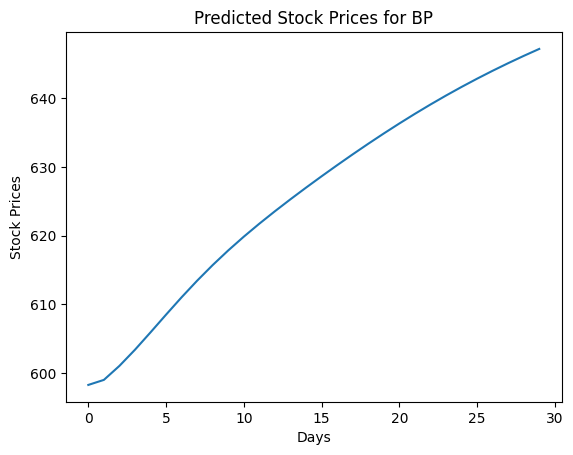

In [ ]:
plt.plot(predictions,label='Close')
plt.title('Predicted Stock Prices for BP')
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.show()